In [109]:
import numpy as np                       # type: ignore
import pandas as pd     # type: ignore
import matplotlib.pyplot as plt               # type: ignore


In [110]:
df= pd.read_excel('height_weight_data.xlsx')
df.head(2)


,Height,Weight
0,140.000000,89.068074
1,140.606061,89.508315


In [111]:
print(" Height Mean : " , df['Height'].mean())
print(" Weight mean " , df['Weight'].mean())


 Height Mean :  170.00000000000003
 Weight mean  105.08611380387974


In [112]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  100 non-null    float64
 1   Weight  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [113]:
df.describe()

,Height,Weight
count,100.000000,100.000000
mean,170.000000,105.086114
std,17.582722,8.797071
min,140.000000,87.565712
25%,155.000000,97.952522
50%,170.000000,104.747620
75%,185.000000,111.669577
max,200.000000,121.960595


Text(0, 0.5, 'Height')

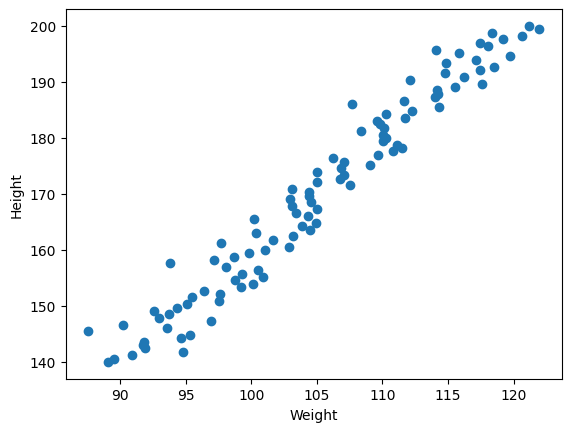

In [114]:
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [115]:
# Coorelation
df.corr()

,Height,Weight
Height,1.000000,0.976606
Weight,0.976606,1.000000


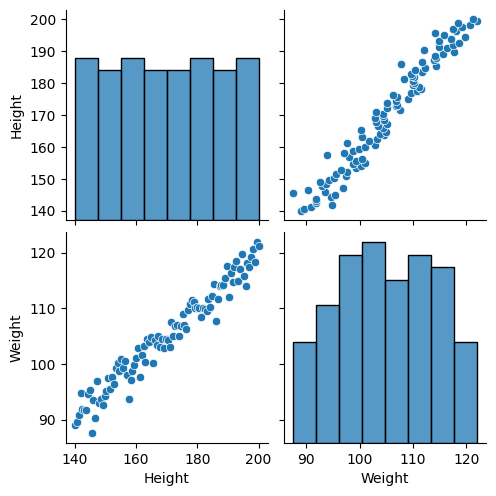

In [116]:
import seaborn as sns   # type: ignore 
sns.pairplot(df)  


In [117]:
Y = df[['Weight']] ## Independent feature should be Dataframe or 2d array 
Y.head()

,Weight
0,89.068074
1,89.508315
2,90.910016
3,94.805571
4,91.857334


In [118]:
Y_series = df['Weight']

In [119]:
X = df['Height']

In [120]:
## Train test Split 
from sklearn.model_selection import train_test_split

Y_train , Y_test  , X_train , X_test = train_test_split( Y ,  X , test_size=0.25 , random_state= 42 )

In [121]:
Y_train.shape

(75, 1)

In [122]:
## Standadization 
from sklearn.preprocessing import StandardScaler


In [123]:
scalar = StandardScaler()
Y_train = scalar.fit_transform(Y_train)

In [124]:
Y_test = scalar.transform(Y_test)

In [125]:
## Apply Linear Regression 
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs= -1)

In [126]:
regression.fit(Y_train , X_train)

LinearRegression(n_jobs=-1)

In [127]:
print("Coefficient or slope : " ,regression.coef_)
print("Intercept ", regression.intercept_)

Coefficient or slope :  [17.369305]
Intercept  170.54545454545453


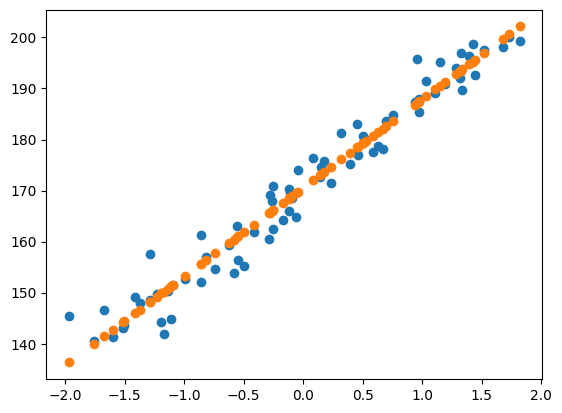

In [128]:
plt.scatter( Y_train ,X_train)
plt.scatter(Y_train , regression.predict(Y_train))

In [129]:
# prediction for test data 
x_pred = regression.predict(Y_test)

In [130]:
## preformance Metrices 
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(X_test , x_pred)
mae = mean_absolute_error(X_test , x_pred)

print(mse)
print(mae)

18.43894403276214
3.5410795612968355


In [131]:
from sklearn.metrics import r2_score
score = r2_score(X_test , x_pred)
print(score)

0.9334075863191196


In [133]:
#  Display adjusted r 
1 - (1 - score)* (len(X_test) -1 )/(len(X_test) - Y_test.shape[1]-1)

0.9305122639851683

In [ ]:
! pip instal statsmodels

In [134]:
# OLS Linear Regression 
import statsmodels.api  as sm 
model = sm.OLS(X_train , Y_train).fit()

ModuleNotFoundError: No module named 'statsmodels'